In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config IPCompleter.greedy=True

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import shapiro
import statsmodels.api as sm 
import pylab as py 

from scipy.stats import kstest, norm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving VoidsP.csv to VoidsP (4).csv


In [0]:
import io
voids_df = pd.read_csv(io.BytesIO(uploaded['VoidsP.csv']), sep=';')

In [4]:
voids_df.head()

,Pin,GreatestVoidArea
0,1,3.987
1,1,0.000
2,2,0.000
3,3,0.000
4,4,0.000


In [0]:
voids = voids_df.iloc[1:]

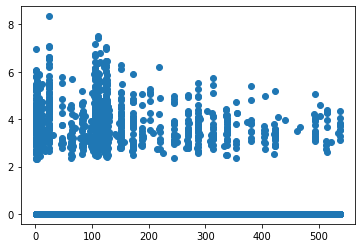

In [6]:
plt.scatter(x='Pin', y='GreatestVoidArea', data=voids)

(array([5.2055e+04, 0.0000e+00, 1.7000e+01, 3.6500e+02, 3.9000e+02,
        2.4100e+02, 9.2000e+01, 4.1000e+01, 1.0000e+01, 1.0000e+00]),
 array([0.        , 0.83453237, 1.66906475, 2.50359712, 3.3381295 ,
        4.17266187, 5.00719424, 5.84172662, 6.67625899, 7.51079137,
        8.34532374]),
 <a list of 10 Patch objects>)

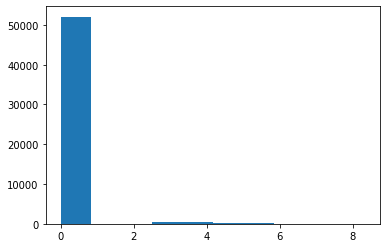

In [7]:
plt.hist(x='GreatestVoidArea', data=voids)

NORMALITY TEST


Kolmogorov–Smirnov Statistics: 0.5
Kolmogorov–Smirnov Pvalue Statistics: 0.0
Shapiro Statistics: 0.12807023525238037
Shapiro Pvalue Statistics: 0.0

In this case, the test rejects the hypothesis of normality when the p-value
is less than or equal to 0.05. Failing the normality test allows
you to state with 95% confidence the data does not fit the normal distribution


An alternative way to assess normality is to construct a QQ-plot
(quantile–quantile plot), also known as a normal probability plot.
If the points lie close to the diagonal line, then 
the corresponding population values could be normal



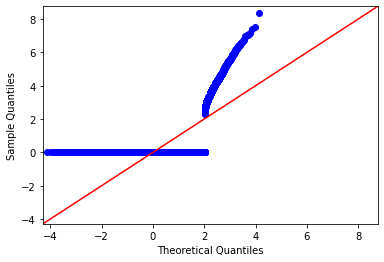

In [8]:
stat, p = shapiro( voids['GreatestVoidArea'])
ks_statistic, p_value = kstest(voids['GreatestVoidArea'], 'norm')

print('NORMALITY TEST\n')
print(f'=======================================================================')
print(f'=======================================================================\n')
print(f'Kolmogorov–Smirnov Statistics: {ks_statistic}')
print(f'Kolmogorov–Smirnov Pvalue Statistics: {p_value}')

print(f'Shapiro Statistics: {stat}')
print(f'Shapiro Pvalue Statistics: {p}\n')

a = ("In this case, the test rejects the hypothesis of normality when the p-value\n"
     "is less than or equal to 0.05. Failing the normality test allows\n"
     "you to state with 95% confidence the data does not fit the normal distribution\n")
print(a)

print(f'=======================================================================')
print(f'=======================================================================\n')

b = ("An alternative way to assess normality is to construct a QQ-plot\n"
    "(quantile–quantile plot), also known as a normal probability plot.\n"
    "If the points lie close to the diagonal line, then \n"
    "the corresponding population values could be normal\n")
print(b)
sm.qqplot(voids['GreatestVoidArea'], line ='45')
py.show() 



In [9]:
voids.dtypes

Pin                   int64
GreatestVoidArea    float64
dtype: object

Text(0, 0.5, 'Density')

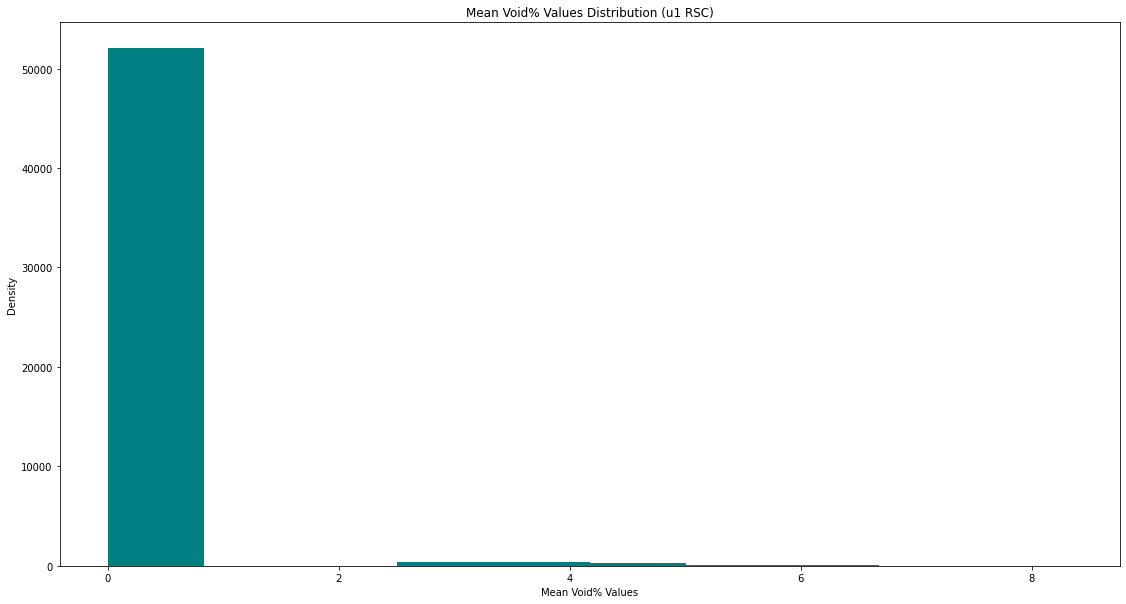

In [18]:
plt.subplots(figsize=(19,10))
plt.hist(x='GreatestVoidArea', data=voids, color="teal")
plt.title('Mean Void% Values Distribution (u1 RSC)')
plt.xlabel('Mean Void% Values')
plt.ylabel('Density') 